# Importing Libraries/Reading in Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('Data/Prem-Tomorrowland_posts_11-16.csv')
df.head()

,title,selftext,subreddit,created_utc
0,Genreverse,"Hi everyone, \n\nHere at Genreverse our ultima...",Tomorrowland,1637031457
1,Tomorrowland and it's bass line-up,So obviously Tomorrowland has always had a gre...,Tomorrowland,1637002849
2,Hand crafts 2021,NaN,Tomorrowland,1636935255
3,Winter TML lodging,hello! I have the 4 day pass without lodging a...,Tomorrowland,1636922669
4,Was Tomorrowland around the world 2020 a speci...,NaN,Tomorrowland,1636904090


In [3]:
df.shape

(2000, 4)

---

# Cleaning/Preprocessing/EDA

### Cleaning/Creating Length Columns

In [4]:
df.isnull().sum()

title            0
selftext       885
subreddit        0
created_utc      0
dtype: int64

In [5]:
df[(df['selftext'].isnull()) & (df['subreddit'] == 'PremierLeague')].shape

(434, 4)

In [6]:
df[(df['selftext'].isnull()) & (df['subreddit'] == 'Tomorrowland')].shape
# almost even split of null values in selftext column between Tomorrowland and Premier League Reddits

(451, 4)

In [7]:
df['selftext'].fillna('', inplace=True)  
# fill with a blank string

In [8]:
length = []
for i in df['selftext']:
    length.append(len(i))
    
df['selftext_length'] = length

In [9]:
num_words = []
for i in df['selftext']:
    num_words.append(len(i.split()))

df['selftext_word_count'] = num_words

In [10]:
df.head()

,title,selftext,subreddit,created_utc,selftext_length,selftext_word_count
0,Genreverse,"Hi everyone, \n\nHere at Genreverse our ultima...",Tomorrowland,1637031457,398,57
1,Tomorrowland and it's bass line-up,So obviously Tomorrowland has always had a gre...,Tomorrowland,1637002849,620,104
2,Hand crafts 2021,,Tomorrowland,1636935255,0,0
3,Winter TML lodging,hello! I have the 4 day pass without lodging a...,Tomorrowland,1636922669,334,65
4,Was Tomorrowland around the world 2020 a speci...,,Tomorrowland,1636904090,0,0


In [11]:
df.groupby('subreddit').mean()[['selftext_length', 'selftext_word_count']]

,selftext_length,selftext_word_count
subreddit,,
PremierLeague,182.256,28.285
Tomorrowland,196.799,33.495


**Premier Leauge posts tend to have shorter selftext lengths and word counts than Tomorrowland posts on average.**

In [12]:
cvec = CountVectorizer(stop_words='english')
cvec.fit(df['selftext'])
selftext_cvec = cvec.transform(df['selftext'])

In [13]:
selftext_words = pd.DataFrame(selftext_cvec.todense(), columns=cvec.get_feature_names())
selftext_words

,00,000,001,005,005056aa7581,00s,01,02,03,04,...,zme2bw5qo,zomer,zone,zones,zonneveld,zoom,zouma,zzzz,ñíguez,čolak
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
selftext_words['which_sub'] = df['subreddit']

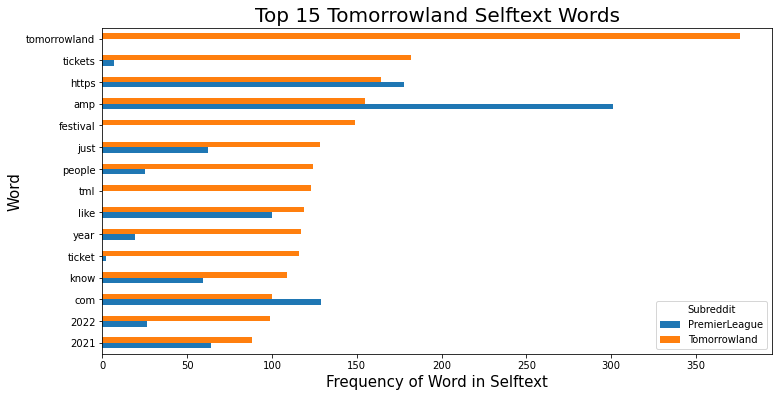

In [15]:
ax = selftext_words.groupby('which_sub').sum().T.sort_values('Tomorrowland', ascending=False).head(15).sort_values('Tomorrowland').plot(kind='barh', figsize=(12,6))
plt.title('Top 15 Tomorrowland Selftext Words', size=20)
plt.xlabel('Frequency of Word in Selftext', size=15)
plt.ylabel('Word', size=15)
ax.legend(title='Subreddit', labels=("PremierLeague","Tomorrowland"))
#plt.savefig('./Visuals/top15tomo_selftext_words.png', bbox_inches='tight');
plt.show();

*Of the top 15 words in Tomorrowland selftexts, there seem to be quite a few words that are also very common in Premier League selftexts as well.  I would predict that the models will have a tougher time predicting which subreddit each selftext came from than they did with just the title.*

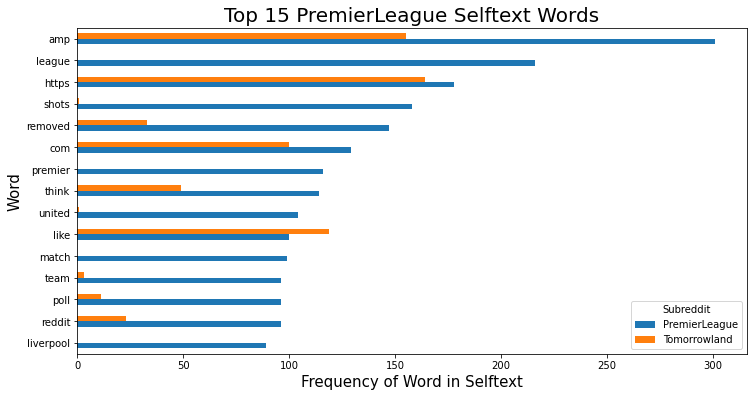

In [16]:
ax = selftext_words.groupby('which_sub').sum().T.sort_values('PremierLeague', ascending=False).head(15).sort_values('PremierLeague').plot(kind='barh', figsize=(12,6))
plt.title('Top 15 PremierLeague Selftext Words', size=20)
plt.xlabel('Frequency of Word in Selftext', size=15)
plt.ylabel('Word', size=15)
ax.legend(title='Subreddit', labels=("PremierLeague","Tomorrowland"))
#plt.savefig('./Visuals/top15prem_selftext_words.png', bbox_inches='tight');
plt.show();

*Of the top 15 words in Premier League selftexts, there seem to be quite a few words that are also very common in Tomorrowland selftexts as well.  I would predict that the models will have a tougher time predicting which subreddit each selftext came from than they did with just the title.*

In [17]:
selftext_and_words = pd.merge(df, selftext_words, on=df.index)
selftext_and_words.drop(columns='key_0', inplace=True)

In [18]:
selftext_and_words.head(2)

,title_x,selftext,subreddit_x,created_utc,selftext_length,selftext_word_count,00,000,001,005,...,zomer,zone,zones,zonneveld,zoom,zouma,zzzz,ñíguez,čolak,which_sub
0,Genreverse,"Hi everyone, \n\nHere at Genreverse our ultima...",Tomorrowland,1637031457,398,57,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Tomorrowland
1,Tomorrowland and it's bass line-up,So obviously Tomorrowland has always had a gre...,Tomorrowland,1637002849,620,104,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Tomorrowland


In [19]:
prem_selftext_words = selftext_and_words[selftext_and_words['subreddit_x'] == 'PremierLeague'].drop(columns=['title_x', 'selftext', 
                                                                                                    'subreddit_x', 'created_utc',
                                                                                                    'selftext_length', 'selftext_word_count',
                                                                                                    'which_sub'])
top15_prem_selftext_words = prem_selftext_words.sum().sort_values(ascending=False).head(15)
top15_prem_selftext_words

amp          301
league       216
https        178
shots        158
removed      147
com          129
premier      116
think        114
united       104
like         100
match         99
reddit        96
poll          96
team          96
liverpool     89
dtype: int64

<BarContainer object of 15 artists>

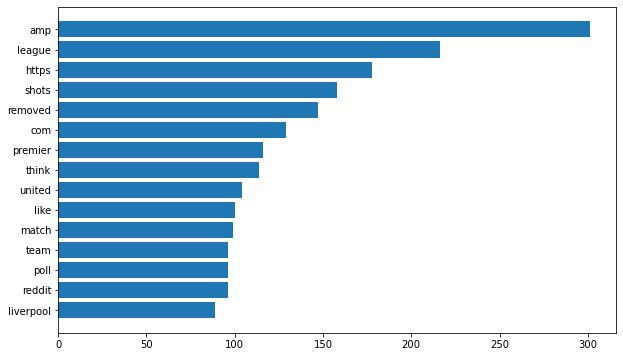

In [20]:
plt.figure(figsize=(10,6))
plt.barh(y=top15_prem_selftext_words.sort_values().index, width=top15_prem_selftext_words.sort_values())

In [21]:
tomo_selftext_words = selftext_and_words[selftext_and_words['subreddit_x'] == 'Tomorrowland'].drop(columns=['title_x', 'selftext', 
                                                                                                    'subreddit_x', 'created_utc',
                                                                                                    'selftext_length', 'selftext_word_count', 
                                                                                                   'which_sub'])
top15_tomo_selftext_words = tomo_selftext_words.sum().sort_values(ascending=False).head(15)
top15_tomo_selftext_words

tomorrowland    376
tickets         182
https           164
amp             155
festival        149
just            128
people          124
tml             123
like            119
year            117
ticket          116
know            109
com             100
2022             99
2021             88
dtype: int64

<BarContainer object of 15 artists>

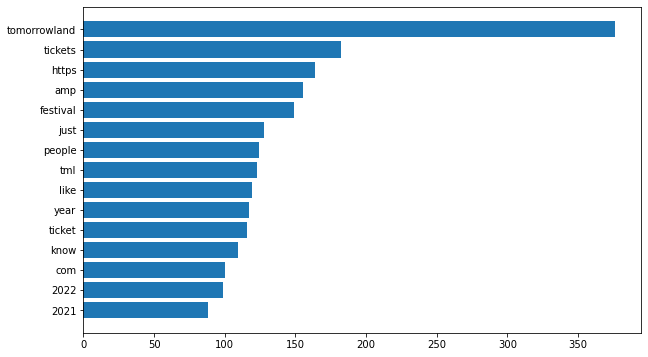

In [22]:
plt.figure(figsize=(10,6))
plt.barh(y=top15_tomo_selftext_words.sort_values().index, width=top15_tomo_selftext_words.sort_values())

---

# Models

### Model Preparation

In [23]:
df['subreddit'] = df['subreddit'].map({'Tomorrowland': 0, 'PremierLeague': 1})

In [24]:
X = df['selftext']
y = df['subreddit']

In [25]:
y.value_counts(normalize=True)
# baseline accuracy of 50% if predicting subreddit is from Premier League subreddit <- looking to beat this

0    0.5
1    0.5
Name: subreddit, dtype: float64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

---

### Model 1 - KNN with CountVectorizer

In [27]:
pipe1 = Pipeline([
    ('cvec', CountVectorizer()),
    ('knn', KNeighborsClassifier())
])

In [28]:
params1 = {
    'cvec__min_df': [15, 16, 17],
    'cvec__max_df': [.1, .2, .3],
    'cvec__binary': [True, False],
    'cvec__stop_words': [None, 'english'],
    'knn__weights': ['uniform', 'distance']
}

In [29]:
gs1 = GridSearchCV(pipe1, param_grid=params1)
gs1.fit(X_train, y_train)
print(gs1.best_score_)
gs1.best_params_

0.6693333333333333


{'cvec__binary': False,
 'cvec__max_df': 0.2,
 'cvec__min_df': 16,
 'cvec__stop_words': 'english',
 'knn__weights': 'uniform'}

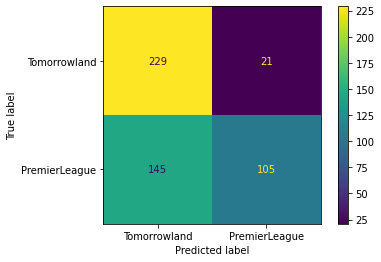

In [30]:
metrics.plot_confusion_matrix(gs1, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

In [31]:
preds1 = gs1.predict(X_test)
tn1, fp1, fn1, tp1 = metrics.confusion_matrix(y_test, preds1).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland selftexts?**

In [32]:
tn1 / (tn1 + fp1)   # Model was very good at predicting subreddit if selftext came from Tomorrowland

0.916

**Sensitivity - How good did the model perform at predicting Premier League selftexts?**

In [33]:
tp1 / (tp1 + fn1)   # Model was not good at all predicting subreddit if selftext came from Premier League (worse than baseline)

0.42

In [34]:
preds1 = gs1.predict(X_test)
X_test[(y_test != preds1) & (preds1 == 0)].head(60)

1778    Why did Evans only receive a yellow when Lapor...
1171                                                     
1605                                                     
1088                                                     
1603                                             Discuss.
1571                                                     
1167    Few examples could be Carlo Ancelotti back to ...
1475                                                     
1295                                                     
1919    Hello,my name's Joshua and I don't post much s...
1641                                                     
1333                                                     
1041                                                     
1038    I question whether some fan channels are trues...
1647                                                     
1228    What kinda match do you prefer for your team? ...
1574                                                     
1801    Not ba

In [35]:
X_test[(y_test != preds1) & (preds1 == 1)].head(21)

270    Ugh of course they messed up PDT again, where ...
937    Getting static / distortion while playing thro...
106                                            [removed]
475                                            [removed]
553                                            [removed]
491    Hello all! Since we still don't know if the fe...
562                                            [removed]
214                                            [removed]
413    I saw some of you wondering when/who received ...
987    Includes Train ride from Amsterdam to Belgium\...
269    Not only that I have to see that "You are a pi...
928    Sorry if this is a stupid question - I was jus...
337    Hey guys, do u know if there is any discount c...
98                                             [removed]
315    I‘m amazed by the quality of everything surrou...
880                                            [removed]
782    When are we able to and when is the deadline t...
540                            

In [36]:
pred1_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': gs1.predict_proba(X_test)[:,1]})

pred1_df.head()

,true_values,pred_probs
1370,1,1.0
654,0,0.4
1778,1,0.4
646,0,0.4
1171,1,0.4


C:\Users\ao322\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


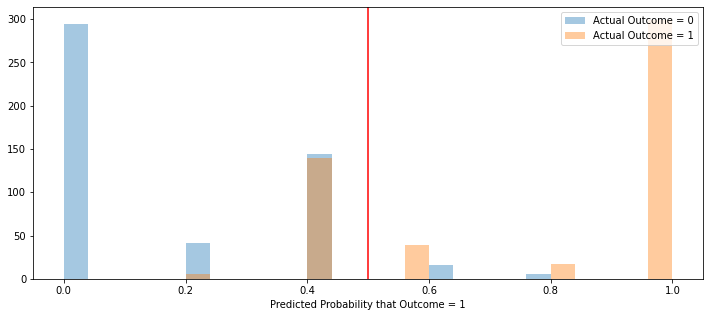

In [37]:
plt.figure(figsize = (12, 5))

# code from classification metrics lecture ii
for group in pred1_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 20, label = [f'Actual Outcome = {group[0]}'])

plt.axvline(y.mean(), color='r')
plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();

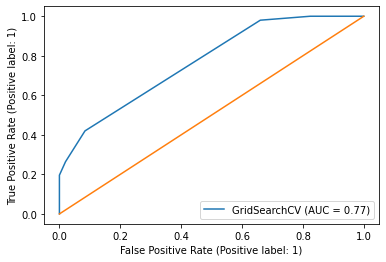

In [38]:
# ROC curve for Model 1
metrics.plot_roc_curve(gs1, X_test, y_test)
# worst case scenario line
plt.plot([0,1], [0,1], label='Baseline');

---

### Model 2 - KNN with TFIDF

In [39]:
pipe2 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

In [40]:
params2 = {
    'tvec__stop_words': ['english', None],
    'tvec__min_df': [23, 24, 25],
    'tvec__max_df': [.1, .2, .3],
    'tvec__ngram_range': [(1,1), (1,2)],
    'knn__weights': ['uniform', 'distance']
}

In [41]:
gs2 = GridSearchCV(pipe2, param_grid=params2)
gs2.fit(X_train, y_train)
print(gs2.best_score_)
gs2.best_params_

0.6866666666666666


{'knn__weights': 'distance',
 'tvec__max_df': 0.1,
 'tvec__min_df': 24,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

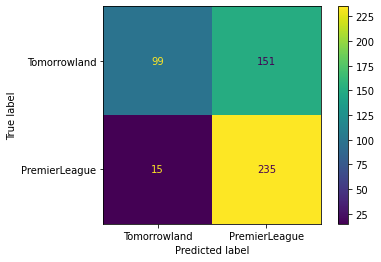

In [42]:
metrics.plot_confusion_matrix(gs2, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

In [43]:
preds2 = gs2.predict(X_test)
tn2, fp2, fn2, tp2 = metrics.confusion_matrix(y_test, preds2).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland selftexts?**

In [44]:
tn2 / (tn2 + fp2)   # Model was not good at all predicting subreddit if selftext came from Tomorrowland (worse than baseline)

0.396

**Sensitivity - How good did the model perform at predicting Premier League selftexts?**

In [45]:
tp2 / (tp2 + fn2)   # Model was very good at predicting subreddit if selftext came from Premier League

0.94

In [46]:
preds2 = gs2.predict(X_test)
X_test[(y_test != preds2) & (preds2 == 0)].head(15)

1778    Why did Evans only receive a yellow when Lapor...
1919    Hello,my name's Joshua and I don't post much s...
1062    I'm fed up of 3pm games not being showed and h...
1010    &amp;#x200B;\n\nhttps://preview.redd.it/7u4mrj...
1991    Tottenham, once upon a time, we're like Thrash...
1404    He’s obviously way below managers like Pep, Kl...
1004     FYI, would have loved to have spoken to Shin ...
1621    Does a manager really influence performance th...
1083    Hello Everyone, \n\nI am studying abroad from ...
1260    The last time they were all in the top 6 was 2...
1897    Hello! I am an American currently living the U...
1156    Their recent performances have been abysmal an...
1348     I would like my crow cooked medium rare, please.
1804    Don't conceded. Even A draw could have got us ...
1959    &amp;#x200B;\n\nhttps://preview.redd.it/egt90w...
Name: selftext, dtype: object

In [47]:
X_test[(y_test != preds2) & (preds2 == 1)].head(60)

654                                                     
646                                                     
484                                                     
566                                                     
839                                                     
772                                                     
35                                                      
700                                                     
614                                                     
347                                                     
546                                                     
233                                                     
686                                                     
821                                                     
504                                                     
702    Hey guys,\n\nI ran into the issue of having to...
270    Ugh of course they messed up PDT again, where ...
937    Getting static / distort

In [48]:
pred2_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': gs2.predict_proba(X_test)[:,1]})

pred2_df.head()

,true_values,pred_probs
1370,1,0.819447
654,0,0.600000
1778,1,0.408591
646,0,0.600000
1171,1,0.600000


C:\Users\ao322\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


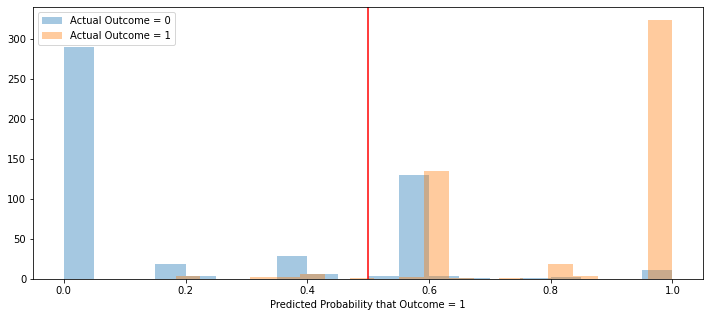

In [49]:
plt.figure(figsize = (12, 5))

# code from classification metrics lecture ii
for group in pred2_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 20, label = [f'Actual Outcome = {group[0]}'])

plt.axvline(y.mean(), color='r')
plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();

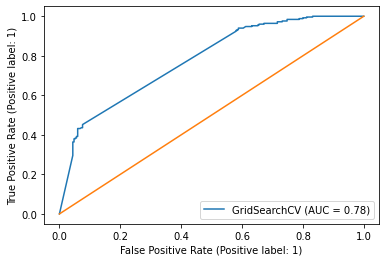

In [50]:
# ROC curve for Model 2
metrics.plot_roc_curve(gs2, X_test, y_test)
# worst case scenario line
plt.plot([0,1], [0,1], label='Baseline');

---

### Model 3 - Logistic Regression with CountVectorizer

In [51]:
pipe3 = Pipeline([
    ('cvec', CountVectorizer()),
    ('logreg', LogisticRegression())
])

In [52]:
params3 = {
    'cvec__min_df': [1, 2, 3],
    'cvec__max_df': [.1, .2, .3],
    'cvec__binary': [True, False],
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range': [(1,1), (1,2)],
    'logreg__C': [1, 2, 3]
}

In [53]:
gs3 = GridSearchCV(pipe3, param_grid=params3)
gs3.fit(X_train, y_train)
print(gs3.best_score_)
gs3.best_params_

0.7360000000000001


{'cvec__binary': True,
 'cvec__max_df': 0.1,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english',
 'logreg__C': 1}

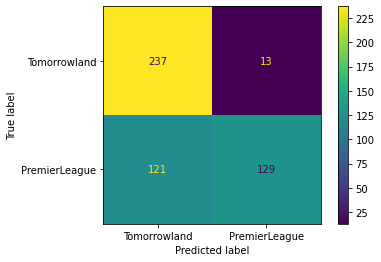

In [54]:
metrics.plot_confusion_matrix(gs3, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

In [55]:
preds3 = gs3.predict(X_test)
tn3, fp3, fn3, tp3 = metrics.confusion_matrix(y_test, preds3).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland selftexts?**

In [56]:
tn3 / (tn3 + fp3)   # Model was very good at predicting subreddit if selftext came from Tomorrowland

0.948

**Sensitivity - How good did the model perform at predicting Premier League selftexts?**

In [57]:
tp3 / (tp3 + fn3)   # Model was not very good at predicting subreddit if selftext came from Premier League (almost equal to baseline)

0.516

In [58]:
preds3 = gs3.predict(X_test)
X_test[(y_test != preds3) & (preds3 == 0)].head(60)

1778    Why did Evans only receive a yellow when Lapor...
1171                                                     
1605                                                     
1088                                                     
1603                                             Discuss.
1571                                                     
1167    Few examples could be Carlo Ancelotti back to ...
1024    If I had to choose just one person. I'm going ...
1475                                                     
1295                                                     
1641                                                     
1333                                                     
1041                                                     
1647                                                     
1574                                                     
1711                                                     
1290                                                     
1031          

In [59]:
X_test[(y_test != preds3) & (preds3 == 1)].head(13)

106                                            [removed]
475                                            [removed]
553                                            [removed]
562                                            [removed]
214                                            [removed]
600    Anyone has a good 1-2 hour mashup of the best ...
98                                             [removed]
288                             If so, can you share? ❤️
880                                            [removed]
632    Don’t use Reddit much but I have been trying t...
540                                            [removed]
317                                            [removed]
64     \n\n[View Poll](https://www.reddit.com/poll/q9...
Name: selftext, dtype: object

In [60]:
pred3_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': gs3.predict_proba(X_test)[:,1]})

pred3_df.head()

,true_values,pred_probs
1370,1,0.927869
654,0,0.482302
1778,1,0.406178
646,0,0.482302
1171,1,0.482302


C:\Users\ao322\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


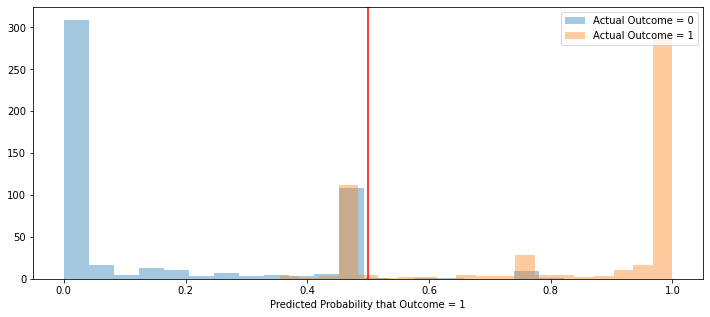

In [61]:
plt.figure(figsize = (12, 5))

# code from classification metrics lecture ii
for group in pred3_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 20, label = [f'Actual Outcome = {group[0]}'])

plt.axvline(y.mean(), color='r')
plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();

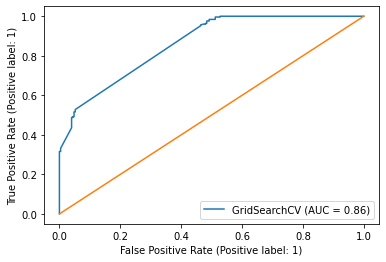

In [62]:
# ROC curve for Model 3
metrics.plot_roc_curve(gs3, X_test, y_test)
# worst case scenario line
plt.plot([0,1], [0,1], label='Baseline');

---

### Model 4 - Logistic Regression with TFIDF

In [63]:
pipe4 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('logreg', LogisticRegression())
])

In [64]:
params4 = {
    'tvec__stop_words': [None, 'english'],
    'tvec__min_df': [1, 2, 3, 4, 5],
    'tvec__max_df': [.2, .3, .4],
    'tvec__ngram_range': [(1,1), (1,2)],
    'logreg__C': [1, 2, 3]
}

In [65]:
gs4 = GridSearchCV(pipe4, param_grid=params4)
gs4.fit(X_train, y_train)
print(gs4.best_score_)
gs4.best_params_

0.74


{'logreg__C': 3,
 'tvec__max_df': 0.2,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

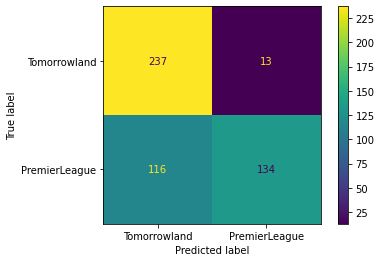

In [66]:
metrics.plot_confusion_matrix(gs4, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

In [67]:
preds4 = gs4.predict(X_test)
tn4, fp4, fn4, tp4 = metrics.confusion_matrix(y_test, preds4).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland selftexts?**

In [68]:
tn4 / (tn4 + fp4)   # Model was very good at predicting subreddit if selftext came from Tomorrowland

0.948

**Sensitivity - How good did the model perform at predicting Premier League selftexts?**

In [69]:
tp4 / (tp4 + fn4)   # Model was not very good at predicting subreddit if selftext came from Premier League (almost equal to baseline)

0.536

In [70]:
preds4 = gs4.predict(X_test)
X_test[(y_test != preds4) & (preds4 == 0)].head(60)

1778    Why did Evans only receive a yellow when Lapor...
1171                                                     
1605                                                     
1088                                                     
1603                                             Discuss.
1571                                                     
1024    If I had to choose just one person. I'm going ...
1475                                                     
1295                                                     
1641                                                     
1333                                                     
1041                                                     
1647                                                     
1574                                                     
1711                                                     
1290                                                     
1031                                                     
1578          

In [71]:
X_test[(y_test != preds4) & (preds4 == 1)].head(13)

106                                            [removed]
475                                            [removed]
553                                            [removed]
562                                            [removed]
214                                            [removed]
564    We're proud to be one of the featured sub-Redd...
98                                             [removed]
288                             If so, can you share? ❤️
880                                            [removed]
540                                            [removed]
317                                            [removed]
64     \n\n[View Poll](https://www.reddit.com/poll/q9...
384    &amp;#x200B;\n\nhttps://preview.redd.it/gpdyrg...
Name: selftext, dtype: object

In [72]:
pred4_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': gs4.predict_proba(X_test)[:,1]})

pred4_df.head()

,true_values,pred_probs
1370,1,0.808334
654,0,0.484631
1778,1,0.380438
646,0,0.484631
1171,1,0.484631


C:\Users\ao322\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


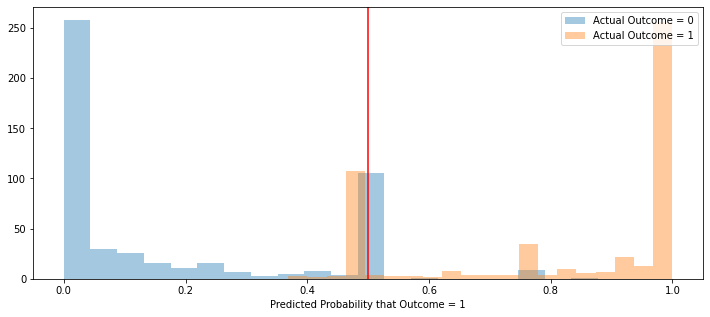

In [73]:
plt.figure(figsize = (12, 5))

# code from classification metrics lecture ii
for group in pred4_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 20, label = [f'Actual Outcome = {group[0]}'])

plt.axvline(y.mean(), color='r')
plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();

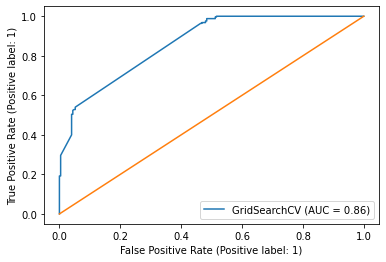

In [74]:
# ROC curve for Model 4
metrics.plot_roc_curve(gs4, X_test, y_test)
# worst case scenario line
plt.plot([0,1], [0,1], label='Baseline');

---

### Model 5 - Decision Tree with CountVectorizer

In [75]:
pipe5 = Pipeline([
    ('cvec', CountVectorizer()),
    ('dt', DecisionTreeClassifier())
])

In [76]:
params5 = {
    'cvec__min_df': [1, 2, 3, 4],
    'cvec__max_df': [.1, .2, .3, .4],
    'cvec__binary': [True, False],
    'cvec__stop_words': ['english', None],
    'dt__random_state': [10],
    'dt__min_samples_split': [5, 6, 7, 8, 9, 10]
}

In [77]:
gs5 = GridSearchCV(pipe5, param_grid=params5)
gs5.fit(X_train, y_train)
print(gs5.best_score_)
gs5.best_params_

0.7133333333333333


{'cvec__binary': True,
 'cvec__max_df': 0.2,
 'cvec__min_df': 2,
 'cvec__stop_words': 'english',
 'dt__min_samples_split': 8,
 'dt__random_state': 10}

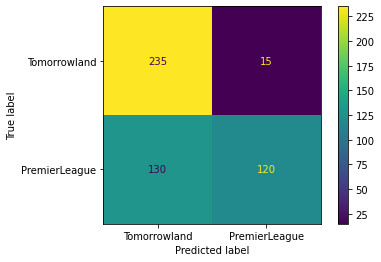

In [78]:
metrics.plot_confusion_matrix(gs5, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

In [79]:
preds5 = gs5.predict(X_test)
tn5, fp5, fn5, tp5 = metrics.confusion_matrix(y_test, preds5).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland selftexts?**

In [80]:
tn5 / (tn5 + fp5)   # Model was very good at predicting subreddit if selftext came from Tomorrowland

0.94

**Sensitivity - How good did the model perform at predicting Premier League selftexts?**

In [81]:
tp5 / (tp5 + fn5)   # Model was not very good at predicting subreddit if selftext came from Premier League (almost equal to baseline)

0.48

In [82]:
preds5 = gs5.predict(X_test)
X_test[(y_test != preds5) & (preds5 == 0)].head(60)

1778    Why did Evans only receive a yellow when Lapor...
1171                                                     
1605                                                     
1088                                                     
1603                                             Discuss.
1571                                                     
1167    Few examples could be Carlo Ancelotti back to ...
1024    If I had to choose just one person. I'm going ...
1475                                                     
1295                                                     
1641                                                     
1333                                                     
1041                                                     
1647                                                     
1574                                                     
1801    Not bad for a team as universally pilloried as...
1062    I'm fed up of 3pm games not being showed and h...
1711          

In [83]:
X_test[(y_test != preds5) & (preds5 == 1)].head(15)

106                                            [removed]
475                                            [removed]
553                                            [removed]
562                                            [removed]
214                                            [removed]
724    The decision on the summer festivals by the be...
385    In my account I can change the names now but w...
337    Hey guys, do u know if there is any discount c...
98                                             [removed]
880                                            [removed]
627    [https://www.vrt.be/vrtnws/en/2021/04/24/flemi...
540                                            [removed]
317                                            [removed]
410    PNigma Feat. BuSuJ\n\n&amp;#x200B;\n\n&amp;#x2...
384    &amp;#x200B;\n\nhttps://preview.redd.it/gpdyrg...
Name: selftext, dtype: object

In [84]:
pred5_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': gs5.predict_proba(X_test)[:,1]})

pred5_df.head()

,true_values,pred_probs
1370,1,1.00000
654,0,0.48605
1778,1,0.48605
646,0,0.48605
1171,1,0.48605


C:\Users\ao322\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


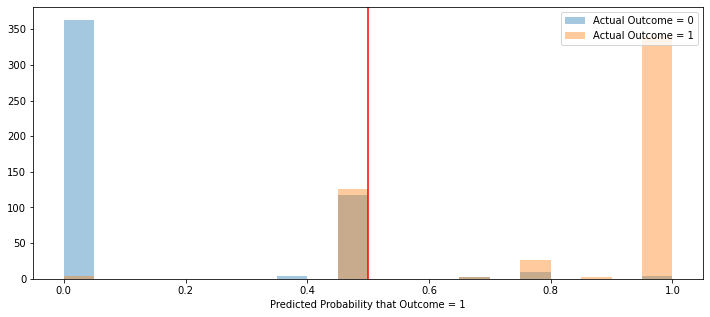

In [85]:
plt.figure(figsize = (12, 5))

# code from classification metrics lecture ii
for group in pred5_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 20, label = [f'Actual Outcome = {group[0]}'])

plt.axvline(y.mean(), color='r')
plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();

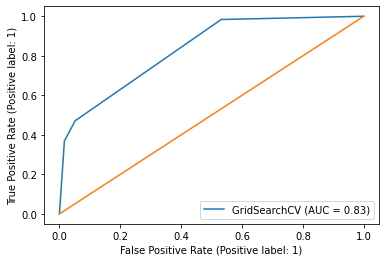

In [86]:
# ROC curve for Model 5
metrics.plot_roc_curve(gs5, X_test, y_test)
# worst case scenario line
plt.plot([0,1], [0,1], label='Baseline');

---

### Model 6 - Decision Tree with TFIDF

In [87]:
pipe6 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('dt', DecisionTreeClassifier())
])

In [88]:
params6 = {
    'tvec__stop_words': ['english', None],
    'tvec__min_df': [2, 3, 4, 5, 6],
    'tvec__max_df': [.1, .2, .3, .4],
    'tvec__ngram_range': [(1,1), (1,2)],
    'dt__random_state': [42],
    'dt__min_samples_split': [2, 3, 4]
}

In [89]:
gs6 = GridSearchCV(pipe6, param_grid=params6)
gs6.fit(X_train, y_train)
print(gs6.best_score_)
gs6.best_params_

0.7033333333333334


{'dt__min_samples_split': 3,
 'dt__random_state': 42,
 'tvec__max_df': 0.2,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

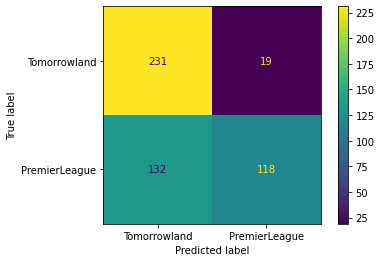

In [90]:
metrics.plot_confusion_matrix(gs6, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

In [91]:
preds6 = gs6.predict(X_test)
tn6, fp6, fn6, tp6 = metrics.confusion_matrix(y_test, preds6).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland selftexts?**

In [92]:
tn6 / (tn6 + fp6)   # Model was very good at predicting subreddit if selftext came from Tomorrowland

0.924

**Sensitivity - How good did the model perform at predicting Premier League selftexts?**

In [93]:
tp6 / (tp6 + fn6)   # Model was not very good at predicting subreddit if selftext came from Premier League (almost equal to baseline)

0.472

In [94]:
preds6 = gs6.predict(X_test)
X_test[(y_test != preds6) & (preds6 == 0)].head(60)

1778    Why did Evans only receive a yellow when Lapor...
1171                                                     
1605                                                     
1088                                                     
1603                                             Discuss.
1571                                                     
1167    Few examples could be Carlo Ancelotti back to ...
1475                                                     
1295                                                     
1641                                                     
1333                                                     
1041                                                     
1647                                                     
1574                                                     
1711                                                     
1290                                                     
1031                                                     
1578          

In [95]:
X_test[(y_test != preds6) & (preds6 == 1)].head(19)

106                                            [removed]
475                                            [removed]
553                                            [removed]
890    I figured out together with my son that we can...
562                                            [removed]
27     Hey everyone,\n\nJust wondering about lodging ...
214                                            [removed]
379    As title, you have time until July 31st.\n\nSe...
269    Not only that I have to see that "You are a pi...
337    Hey guys, do u know if there is any discount c...
98                                             [removed]
315    I‘m amazed by the quality of everything surrou...
831    I was looking for a list of the top 100 songs ...
880                                            [removed]
510    Waiting on pins and needles here, was expectin...
540                                            [removed]
317                                            [removed]
624    So Tomorrowlans is famou

In [96]:
pred6_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': gs6.predict_proba(X_test)[:,1]})

pred6_df.head()

,true_values,pred_probs
1370,1,1.00000
654,0,0.48605
1778,1,0.48605
646,0,0.48605
1171,1,0.48605


C:\Users\ao322\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


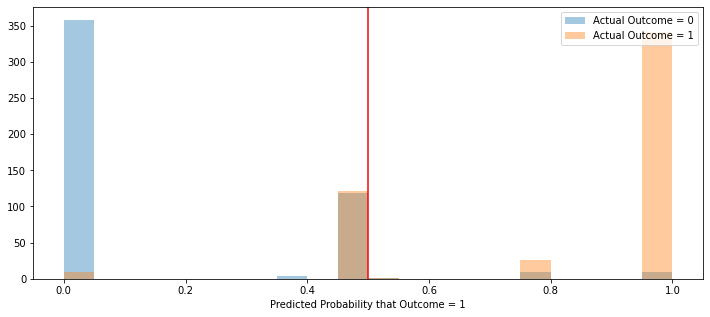

In [97]:
plt.figure(figsize = (12, 5))

# code from classification metrics lecture ii
for group in pred6_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 20, label = [f'Actual Outcome = {group[0]}'])

plt.axvline(y.mean(), color='r')
plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();

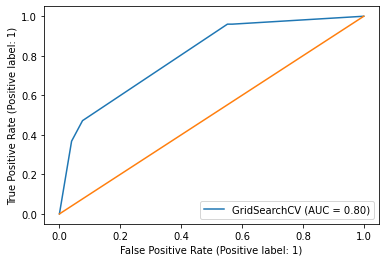

In [98]:
# ROC curve for Model 6
metrics.plot_roc_curve(gs6, X_test, y_test)
# worst case scenario line
plt.plot([0,1], [0,1], label='Baseline');

---

### Model 7 - RandomForest with CountVectorizer

In [99]:
pipe7 = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

In [100]:
params7 = {
    'cvec__min_df': [1, 2, 3, 4],
    'cvec__max_df': [.1, .2, .3, .4],
    'cvec__binary': [True, False],
    'cvec__stop_words': ['english', None],
    'rf__random_state': [42]
}

In [101]:
gs7 = GridSearchCV(pipe7, param_grid=params7)
gs7.fit(X_train, y_train)
print(gs7.best_score_)
gs7.best_params_

0.7366666666666667


{'cvec__binary': True,
 'cvec__max_df': 0.2,
 'cvec__min_df': 2,
 'cvec__stop_words': 'english',
 'rf__random_state': 42}

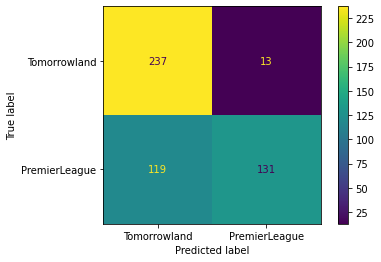

In [102]:
metrics.plot_confusion_matrix(gs7, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

In [103]:
preds7 = gs7.predict(X_test)
tn7, fp7, fn7, tp7 = metrics.confusion_matrix(y_test, preds7).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland selftexts?**

In [104]:
tn7 / (tn7 + fp7)   # Model was very good at predicting subreddit if selftext came from Tomorrowland

0.948

**Sensitivity - How good did the model perform at predicting Premier League selftexts?**

In [105]:
tp7 / (tp7 + fn7)   # Model was not very good at predicting subreddit if selftext came from Premier League (almost equal to baseline)

0.524

In [106]:
preds7 = gs7.predict(X_test)
X_test[(y_test != preds7) & (preds7 == 0)].head(60)

1778    Why did Evans only receive a yellow when Lapor...
1171                                                     
1605                                                     
1088                                                     
1603                                             Discuss.
1571                                                     
1024    If I had to choose just one person. I'm going ...
1475                                                     
1295                                                     
1919    Hello,my name's Joshua and I don't post much s...
1641                                                     
1333                                                     
1041                                                     
1647                                                     
1574                                                     
1711                                                     
1290                                                     
1031          

In [107]:
X_test[(y_test != preds7) & (preds7 == 1)].head(13)

270    Ugh of course they messed up PDT again, where ...
106                                            [removed]
475                                            [removed]
553                                            [removed]
562                                            [removed]
214                                            [removed]
98                                             [removed]
288                             If so, can you share? ❤️
880                                            [removed]
540                                            [removed]
317                                            [removed]
410    PNigma Feat. BuSuJ\n\n&amp;#x200B;\n\n&amp;#x2...
384    &amp;#x200B;\n\nhttps://preview.redd.it/gpdyrg...
Name: selftext, dtype: object

In [108]:
pred7_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': gs7.predict_proba(X_test)[:,1]})

pred7_df.head()

,true_values,pred_probs
1370,1,0.834591
654,0,0.486816
1778,1,0.433912
646,0,0.486816
1171,1,0.486816


C:\Users\ao322\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


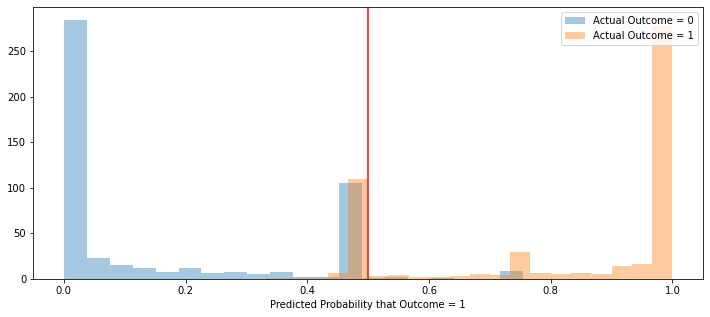

In [109]:
plt.figure(figsize = (12, 5))

# code from classification metrics lecture ii
for group in pred7_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 20, label = [f'Actual Outcome = {group[0]}'])

plt.axvline(y.mean(), color='r')
plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();

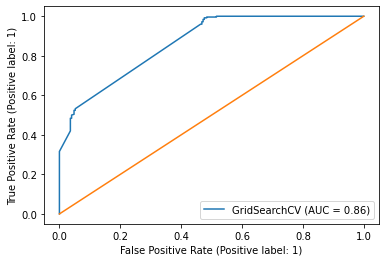

In [110]:
# ROC curve for Model 7
metrics.plot_roc_curve(gs7, X_test, y_test)
# worst case scenario line
plt.plot([0,1], [0,1], label='Baseline');

---

### Model 8 - RandomForest with TFIDF

In [111]:
pipe8 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

In [112]:
params8 = {
    'tvec__stop_words': [None, 'english'],
    'tvec__min_df': [1, 2, 3, 4, 5],
    'tvec__max_df': [.2, .3, .4],
    'tvec__ngram_range': [(1,1), (1,2)],
    'rf__random_state': [42]
}

In [113]:
gs8 = GridSearchCV(pipe8, param_grid=params8)
gs8.fit(X_train, y_train)
print(gs8.best_score_)
gs8.best_params_

0.7353333333333334


{'rf__random_state': 42,
 'tvec__max_df': 0.2,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': 'english'}

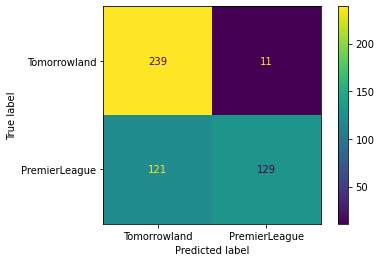

In [114]:
metrics.plot_confusion_matrix(gs8, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

In [115]:
preds8 = gs8.predict(X_test)
tn8, fp8, fn8, tp8 = metrics.confusion_matrix(y_test, preds8).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland selftexts?**

In [116]:
tn8 / (tn8 + fp8)   # Model was very good at predicting subreddit if selftext came from Tomorrowland

0.956

**Sensitivity - How good did the model perform at predicting Premier League selftexts?**

In [117]:
tp8 / (tp8 + fn8)   # Model was not very good at predicting subreddit if selftext came from Premier League (almost equal to baseline)

0.516

In [118]:
preds8 = gs8.predict(X_test)
X_test[(y_test != preds8) & (preds8 == 0)].head(60)

1778    Why did Evans only receive a yellow when Lapor...
1171                                                     
1605                                                     
1088                                                     
1603                                             Discuss.
1571                                                     
1024    If I had to choose just one person. I'm going ...
1475                                                     
1295                                                     
1919    Hello,my name's Joshua and I don't post much s...
1641                                                     
1333                                                     
1041                                                     
1647                                                     
1574                                                     
1711                                                     
1290                                                     
1031          

In [119]:
X_test[(y_test != preds8) & (preds8 == 1)].head(11)

270    Ugh of course they messed up PDT again, where ...
106                                            [removed]
475                                            [removed]
553                                            [removed]
562                                            [removed]
214                                            [removed]
98                                             [removed]
880                                            [removed]
540                                            [removed]
317                                            [removed]
384    &amp;#x200B;\n\nhttps://preview.redd.it/gpdyrg...
Name: selftext, dtype: object

In [120]:
pred8_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': gs8.predict_proba(X_test)[:,1]})

pred8_df.head()

,true_values,pred_probs
1370,1,0.779452
654,0,0.486927
1778,1,0.446040
646,0,0.486927
1171,1,0.486927


C:\Users\ao322\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


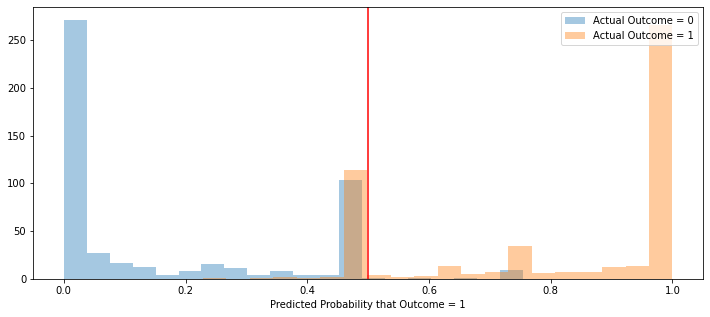

In [121]:
plt.figure(figsize = (12, 5))

# code from classification metrics lecture ii
for group in pred8_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 20, label = [f'Actual Outcome = {group[0]}'])

plt.axvline(y.mean(), color='r')
plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();

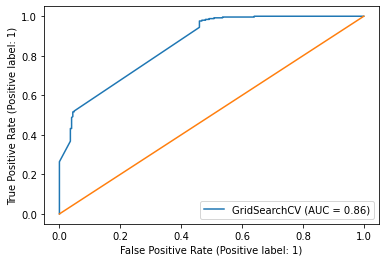

In [122]:
# ROC curve for Model 8
metrics.plot_roc_curve(gs8, X_test, y_test)
# worst case scenario line
plt.plot([0,1], [0,1], label='Baseline');

---

# Analysis

### EDA

*Tomorrowland selftexts seemed to be longer than Premier League selftexts based on total selftext length and selftext word count.  Could be signal for model to help predict between the two subreddits. (Unexplored)*

*After looking at the top 15 word counts in selftexts from each subreddit, the top words from each subreddit seemed to appear several times in the other subreddit as well.  This could be make it difficult for models to be able to predict which subreddit each selftext came from.*

*Also, just under half of the data (885 rows), did not have any selftext and were filled with empty strings.  Although it was just about an even split between the two subreddits, this most certainly will be an issue for the models in predicting the correct subreddit without any data.*

---

### Model Analysis

*All models were able to predict the correct subreddit with accuracies ranging from 67% to 74%, so they were all only a bit better than the baseline.  Models were not able to predict the correct subreddit as well when provided with the selftext data as they were able to when provided with the title data.*

*In every model except the KNN with tfidfvectorizer, the Tomorrowland subreddit was predicted much more than the Premier League subreddit which led higher specificities than sensitivities in those models.*

*When reviewing selftext from the incorrect predictions, there were a lot of empty selftexts and removed/deleted selftexts.  When doing EDA this seemed like it would be a problem.  These empty/deleted/removed selftexts seemed to be given an almost 50/50 chance of prediction to each subreddit which is shown by the distribution of predictions plot.  In those plots for each model, there are several more probabilities closer to the .5 probability and whichever side more of the probabilities were on, that subreddit was predicted more (KNN with tfidf only model where the cluster of 50/50 predictions are on the Premier League side of the 50/50 line).*

*With the exception of the KNN with tfidf model, all models had good precision scores based on the small amount of false positives in those models.*

*The logistic regression model with the tfidfvectorizer was the most accurate model and was able to predict the correct subreddit based on the selftext with an accuracy of 74%.*

*The KNN with the countvectorizer was the least accurate model correctly predicting the subreddit the selftext came from 67% of the time.*

*In all of the models the tfidfvectorizer and the countvectorizer gave similar scores.  Scoring vs. counting words in subreddit selftexts didn't seem to impact the models very much.*

---